**Energy consumption dataset**



In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Algeria.csv')

In [36]:
df

,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,2020-07-17,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
1,2020-07-18,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
2,2020-07-20,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
3,2020-07-21,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
4,2020-07-22,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2022-10-06,0.091,0.045,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
747,2022-10-07,0.091,0.000,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
748,2022-10-08,0.000,0.000,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023
749,2022-10-09,0.136,0.000,0.64,0.0,45.32,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023


**Converting the timestamp column**

In [4]:
df['date']=pd.to_datetime(df['date'])

**Plotting the demand column**

In [5]:
import plotly.express as px

In [6]:
fig = px.line(df, x='date', y='icu_patients_per_million', title='severe cases')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
el_df=df.set_index('date')

**Plotting subplots**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec7a7d6d50>,
      dtype=object)

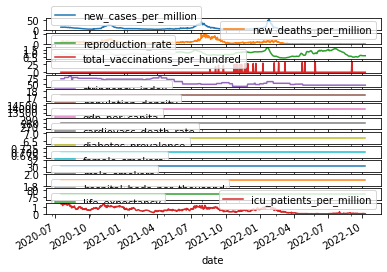

In [8]:
el_df.plot(subplots=True)

**Checking for missing or null values**

In [9]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   date                              False
new_cases_per_million             False
new_deaths_per_million            False
reproduction_rate                 False
total_vaccinations_per_hundred    False
stringency_index                  False
population_density                False
gdp_per_capita                    False
cardiovasc_death_rate             False
diabetes_prevalence               False
female_smokers                    False
male_smokers                      False
hospital_beds_per_thousand        False
life_expectancy                   False
icu_patients_per_million          False
dtype: bool


**Imputing missing values**

In [10]:
df['handwashing_facilities']=df['handwashing_facilities'].fillna(method='ffill')

KeyError: ignored

In [11]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   date                              False
new_cases_per_million             False
new_deaths_per_million            False
reproduction_rate                 False
total_vaccinations_per_hundred    False
stringency_index                  False
population_density                False
gdp_per_capita                    False
cardiovasc_death_rate             False
diabetes_prevalence               False
female_smokers                    False
male_smokers                      False
hospital_beds_per_thousand        False
life_expectancy                   False
icu_patients_per_million          False
dtype: bool


**Dataset resampling**

In [57]:
el_df.resample('W').mean()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2020-07-19,13.513500,0.181000,1.190000,0.0,74.070000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.460000
2020-07-26,13.574000,0.245167,1.118333,0.0,74.070000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.373333
2020-08-02,12.732500,0.220500,0.995000,0.0,79.630000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.363750
2020-08-09,12.002500,0.243500,0.947500,0.0,81.712500,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.295750
2020-08-16,11.057500,0.218667,0.911667,0.0,79.633333,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.007333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.226429,0.000000,0.487143,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.054857
2022-09-25,0.103571,0.000000,0.531429,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.029429
2022-10-02,0.122857,0.000000,0.664286,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec65bd9dd0>,
      dtype=object)

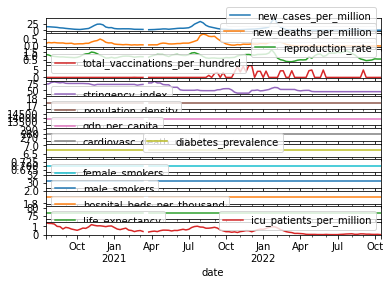

In [56]:
el_df.resample('W').mean().plot(subplots=True)

In [60]:
final_df=el_df.resample('W').mean()

In [62]:
#remove rows with any values that are not finite
final_df = final_df[np.isfinite(final_df).all(1)]

**Implementing the Auto ARIMA model**

In [59]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Initialize the auto arima function**

In [83]:
model = pm.auto_arima(final_df['icu_patients_per_million'], 
                        m=12, seasonal=True,
                      start_p=2, start_q=2, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-209.149, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-207.064, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-210.730, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-210.558, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-207.144, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-210.430, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-208.807, Time=0.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-208.781, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-210.586, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-206.807, Time=1.44 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-208.825, Time=0.14 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-208.803, Time=0.49 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-208.775, Time=0.39 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-210.717, Time=0.30 sec
 ARIMA(2,1,1)(1,0,0

**Splitting the time series dataset**

In [84]:
train=final_df[(final_df.index.get_level_values(0) <= '05/28/2021')]

In [85]:
test=final_df[(final_df.index.get_level_values(0) > '05/28/2021')]

In [86]:
test

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2021-05-30,6.030714,0.151714,1.151429,0.0,61.570000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.514286
2021-06-06,7.220857,0.171143,1.178571,0.0,61.570000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.501286
2021-06-13,7.857714,0.171286,1.107143,0.0,52.047143,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.579000
2021-06-20,7.737500,0.199833,1.065000,0.0,50.460000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.652833
2021-06-27,8.582833,0.199833,1.060000,0.0,50.460000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.573333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.226429,0.000000,0.487143,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.054857
2022-09-25,0.103571,0.000000,0.531429,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.029429
2022-10-02,0.122857,0.000000,0.664286,0.0,45.320000,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.023000


**Fitting the Auto ARIMA model**

In [87]:
model.fit(train['icu_patients_per_million'])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

**Using the Auto ARIMA model to make predictions**

Predicting the test data frame

In [94]:
forecast=model.predict(n_periods=10, return_conf_int=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [95]:
forecast

(44    0.439221
 45    0.438629
 46    0.438579
 47    0.438574
 48    0.438574
 49    0.438574
 50    0.438574
 51    0.438574
 52    0.438574
 53    0.438574
 dtype: float64, array([[ 0.19705428,  0.68138741],
        [ 0.08122092,  0.79603769],
        [-0.00613434,  0.88329186],
        [-0.07899559,  0.95614447],
        [-0.14279894,  1.01994707],
        [-0.20026162,  1.07740969],
        [-0.25296589,  1.13011396],
        [-0.30192846,  1.17907652],
        [-0.34784851,  1.22499657],
        [-0.3912313 ,  1.26837937]]))

In [97]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [98]:
forecast_df

,Prediction
date,
2021-05-30,NaN
2021-06-06,NaN
2021-06-13,NaN
2021-06-20,NaN
2021-06-27,NaN
...,...
2022-09-18,NaN
2022-09-25,NaN
2022-10-02,NaN


**Plotting the Pandas data frame**

In [74]:
import matplotlib.pyplot as plt

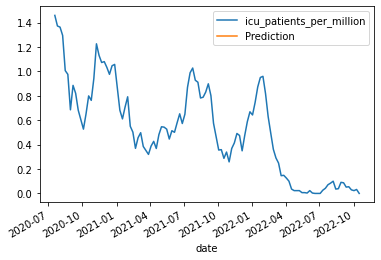

In [75]:
pd.concat([final_df['icu_patients_per_million'],forecast_df],axis=1).plot()

**Predict the unseen future time series values**

In [76]:
forecast1=model.predict(n_periods=60, return_conf_int=True)
forecast_range=pd.date_range(start='02/28/2022', periods=16,freq='W')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [78]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

**Plotting the future predicted values**

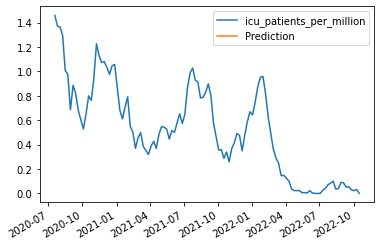

In [79]:
pd.concat([final_df['icu_patients_per_million'],forecast1_df],axis=1).plot()

**Analyzing the accuracy**

In [80]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test['icu_patients_per_million'],forecast_df['Prediction'])))

ValueError: ignored